In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
X_train = np.load("../SpeechER/data_split/X_train.npy")
X_test = np.load("../SpeechER/data_split/X_test.npy")
y_train = np.load("../SpeechER/data_split/y_train.npy")
y_test = np.load("../SpeechER/data_split/y_test.npy")

In [4]:
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=5, activation="relu", padding="same", input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv1D(filters=256, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv1D(filters=128, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=8, activation="softmax"))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()
model.save("../SpeechER/models/model7.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 162, 512)          3072      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 33, 512)          0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 33, 512)          2048      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 33, 512)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 33, 256)           655616    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 7, 256)          

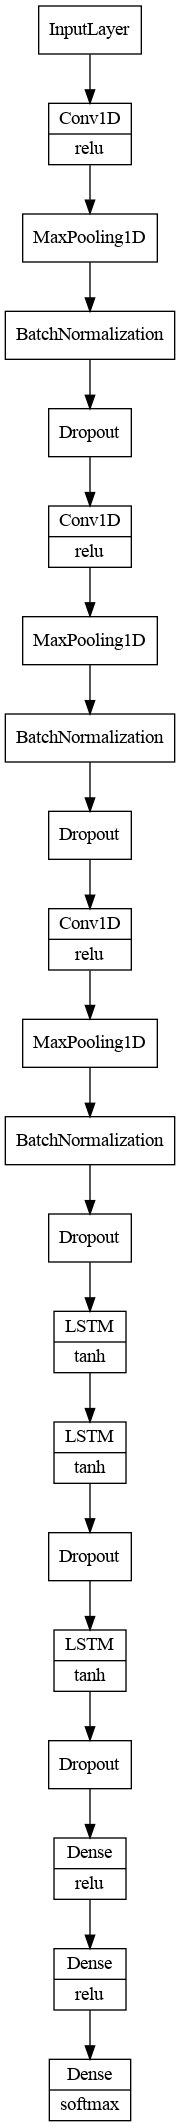

In [5]:
plot_model(model, "../SpeechER/figs/m7arc.png", show_layer_names=False, show_layer_activations=True)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("../SpeechER/checkpoints/model7_best", save_best_only=True)
stop_early = EarlyStopping(monitor='val_loss', patience=20)

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint])

Epoch 1/100


2023-06-04 06:07:13.621296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8901
2023-06-04 06:07:14.394816: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


214/214 [==============================] - ETA: 0s - loss: 1.6854 - accuracy: 0.3106

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 18s 55ms/step - loss: 1.6854 - accuracy: 0.3106 - val_loss: 3.5955 - val_accuracy: 0.1571
Epoch 2/100
214/214 [==============================] - 4s 21ms/step - loss: 1.4411 - accuracy: 0.4224 - val_loss: 3.6887 - val_accuracy: 0.1821
Epoch 3/100
214/214 [==============================] - ETA: 0s - loss: 1.3522 - accuracy: 0.4589

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.3522 - accuracy: 0.4589 - val_loss: 1.4697 - val_accuracy: 0.4206
Epoch 4/100
214/214 [==============================] - ETA: 0s - loss: 1.2941 - accuracy: 0.4855

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.2941 - accuracy: 0.4855 - val_loss: 1.3703 - val_accuracy: 0.4542
Epoch 5/100
214/214 [==============================] - ETA: 0s - loss: 1.2564 - accuracy: 0.5005

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.2564 - accuracy: 0.5005 - val_loss: 1.2763 - val_accuracy: 0.4795
Epoch 6/100
214/214 [==============================] - ETA: 0s - loss: 1.2286 - accuracy: 0.5152

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 50ms/step - loss: 1.2286 - accuracy: 0.5152 - val_loss: 1.2184 - val_accuracy: 0.5113
Epoch 7/100
214/214 [==============================] - ETA: 0s - loss: 1.2047 - accuracy: 0.5205

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.2047 - accuracy: 0.5205 - val_loss: 1.1794 - val_accuracy: 0.5289
Epoch 8/100
214/214 [==============================] - 4s 21ms/step - loss: 1.1896 - accuracy: 0.5288 - val_loss: 1.1848 - val_accuracy: 0.5242
Epoch 9/100
214/214 [==============================] - 4s 21ms/step - loss: 1.1761 - accuracy: 0.5319 - val_loss: 1.1872 - val_accuracy: 0.5175
Epoch 10/100
214/214 [==============================] - ETA: 0s - loss: 1.1607 - accuracy: 0.5381

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 50ms/step - loss: 1.1607 - accuracy: 0.5381 - val_loss: 1.1429 - val_accuracy: 0.5379
Epoch 11/100
214/214 [==============================] - ETA: 0s - loss: 1.1494 - accuracy: 0.5429

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.1494 - accuracy: 0.5429 - val_loss: 1.1232 - val_accuracy: 0.5562
Epoch 12/100
214/214 [==============================] - 4s 21ms/step - loss: 1.1403 - accuracy: 0.5474 - val_loss: 1.1970 - val_accuracy: 0.5203
Epoch 13/100
214/214 [==============================] - 4s 21ms/step - loss: 1.1336 - accuracy: 0.5511 - val_loss: 1.1862 - val_accuracy: 0.5252
Epoch 14/100
214/214 [==============================] - 4s 21ms/step - loss: 1.1199 - accuracy: 0.5573 - val_loss: 1.1829 - val_accuracy: 0.5252
Epoch 15/100
214/214 [==============================] - ETA: 0s - loss: 1.1119 - accuracy: 0.5578

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.1119 - accuracy: 0.5578 - val_loss: 1.0999 - val_accuracy: 0.5615
Epoch 16/100
214/214 [==============================] - ETA: 0s - loss: 1.1082 - accuracy: 0.5580

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.1082 - accuracy: 0.5580 - val_loss: 1.0634 - val_accuracy: 0.5794
Epoch 17/100
214/214 [==============================] - 4s 21ms/step - loss: 1.1019 - accuracy: 0.5633 - val_loss: 1.0817 - val_accuracy: 0.5743
Epoch 18/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0933 - accuracy: 0.5673 - val_loss: 1.0833 - val_accuracy: 0.5628
Epoch 19/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0926 - accuracy: 0.5672 - val_loss: 1.0869 - val_accuracy: 0.5657
Epoch 20/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0828 - accuracy: 0.5689 - val_loss: 1.0857 - val_accuracy: 0.5693
Epoch 21/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0793 - accuracy: 0.5733 - val_loss: 1.0889 - val_accuracy: 0.5625
Epoch 22/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0697 - accuracy: 0.5756 - val_loss: 1.1211 - val_accuracy: 0.54

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.0654 - accuracy: 0.5775 - val_loss: 1.0413 - val_accuracy: 0.5925
Epoch 25/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0552 - accuracy: 0.5810 - val_loss: 1.0548 - val_accuracy: 0.5821
Epoch 26/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0509 - accuracy: 0.5820 - val_loss: 1.0832 - val_accuracy: 0.5647
Epoch 27/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0475 - accuracy: 0.5850 - val_loss: 1.0630 - val_accuracy: 0.5722
Epoch 28/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0421 - accuracy: 0.5894 - val_loss: 1.0879 - val_accuracy: 0.5601
Epoch 29/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0370 - accuracy: 0.5902 - val_loss: 1.0724 - val_accuracy: 0.5705
Epoch 30/100
214/214 [==============================] - ETA: 0s - loss: 1.0294 - accuracy: 0.5975

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.0294 - accuracy: 0.5975 - val_loss: 1.0378 - val_accuracy: 0.5898
Epoch 31/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0283 - accuracy: 0.5964 - val_loss: 1.0974 - val_accuracy: 0.5599
Epoch 32/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0313 - accuracy: 0.5944 - val_loss: 1.0539 - val_accuracy: 0.5830
Epoch 33/100
214/214 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.5981

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.0217 - accuracy: 0.5981 - val_loss: 1.0258 - val_accuracy: 0.5980
Epoch 34/100
214/214 [==============================] - ETA: 0s - loss: 1.0197 - accuracy: 0.5961

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.0197 - accuracy: 0.5961 - val_loss: 1.0048 - val_accuracy: 0.6053
Epoch 35/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0173 - accuracy: 0.5986 - val_loss: 1.0762 - val_accuracy: 0.5741
Epoch 36/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0082 - accuracy: 0.6035 - val_loss: 1.0349 - val_accuracy: 0.5924
Epoch 37/100
214/214 [==============================] - ETA: 0s - loss: 1.0090 - accuracy: 0.6051

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 1.0090 - accuracy: 0.6051 - val_loss: 0.9974 - val_accuracy: 0.6107
Epoch 38/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0041 - accuracy: 0.6060 - val_loss: 1.0138 - val_accuracy: 0.5996
Epoch 39/100
214/214 [==============================] - 4s 21ms/step - loss: 1.0000 - accuracy: 0.6073 - val_loss: 1.0060 - val_accuracy: 0.6045
Epoch 40/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9977 - accuracy: 0.6109 - val_loss: 1.0245 - val_accuracy: 0.5944
Epoch 41/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9982 - accuracy: 0.6077 - val_loss: 1.0103 - val_accuracy: 0.5965
Epoch 42/100
214/214 [==============================] - ETA: 0s - loss: 0.9885 - accuracy: 0.6147

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 0.9885 - accuracy: 0.6147 - val_loss: 0.9951 - val_accuracy: 0.6103
Epoch 43/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9934 - accuracy: 0.6101 - val_loss: 1.0808 - val_accuracy: 0.5686
Epoch 44/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9813 - accuracy: 0.6160 - val_loss: 1.0409 - val_accuracy: 0.5881
Epoch 45/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9804 - accuracy: 0.6157 - val_loss: 1.0168 - val_accuracy: 0.5952
Epoch 46/100
214/214 [==============================] - ETA: 0s - loss: 0.9737 - accuracy: 0.6190

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 0.9737 - accuracy: 0.6190 - val_loss: 0.9869 - val_accuracy: 0.6130
Epoch 47/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9729 - accuracy: 0.6172 - val_loss: 0.9879 - val_accuracy: 0.6102
Epoch 48/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9769 - accuracy: 0.6159 - val_loss: 1.0116 - val_accuracy: 0.6007
Epoch 49/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9707 - accuracy: 0.6198 - val_loss: 0.9987 - val_accuracy: 0.6030
Epoch 50/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9661 - accuracy: 0.6213 - val_loss: 1.0065 - val_accuracy: 0.6026
Epoch 51/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9641 - accuracy: 0.6203 - val_loss: 1.0032 - val_accuracy: 0.6062
Epoch 52/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9563 - accuracy: 0.6255 - val_loss: 1.0949 - val_accuracy: 0.56

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 0.9572 - accuracy: 0.6221 - val_loss: 0.9858 - val_accuracy: 0.6097
Epoch 54/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9587 - accuracy: 0.6231 - val_loss: 1.0175 - val_accuracy: 0.5990
Epoch 55/100
214/214 [==============================] - 5s 21ms/step - loss: 0.9499 - accuracy: 0.6271 - val_loss: 0.9880 - val_accuracy: 0.6149
Epoch 56/100
214/214 [==============================] - 5s 21ms/step - loss: 0.9513 - accuracy: 0.6275 - val_loss: 1.0022 - val_accuracy: 0.6073
Epoch 57/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9519 - accuracy: 0.6290 - val_loss: 1.0343 - val_accuracy: 0.5881
Epoch 58/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9449 - accuracy: 0.6303 - val_loss: 0.9909 - val_accuracy: 0.6070
Epoch 59/100
214/214 [==============================] - ETA: 0s - loss: 0.9443 - accuracy: 0.6328

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 52ms/step - loss: 0.9443 - accuracy: 0.6328 - val_loss: 0.9679 - val_accuracy: 0.6228
Epoch 60/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9461 - accuracy: 0.6293 - val_loss: 0.9747 - val_accuracy: 0.6160
Epoch 61/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9453 - accuracy: 0.6302 - val_loss: 1.0117 - val_accuracy: 0.5972
Epoch 62/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9358 - accuracy: 0.6368 - val_loss: 0.9755 - val_accuracy: 0.6214
Epoch 63/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9353 - accuracy: 0.6328 - val_loss: 1.0091 - val_accuracy: 0.5964
Epoch 64/100
214/214 [==============================] - ETA: 0s - loss: 0.9340 - accuracy: 0.6345

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 52ms/step - loss: 0.9340 - accuracy: 0.6345 - val_loss: 0.9592 - val_accuracy: 0.6246
Epoch 65/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9300 - accuracy: 0.6351 - val_loss: 0.9868 - val_accuracy: 0.6140
Epoch 66/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9291 - accuracy: 0.6378 - val_loss: 0.9772 - val_accuracy: 0.6113
Epoch 67/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9270 - accuracy: 0.6396 - val_loss: 0.9927 - val_accuracy: 0.6124
Epoch 68/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9263 - accuracy: 0.6378 - val_loss: 0.9959 - val_accuracy: 0.6103
Epoch 69/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9202 - accuracy: 0.6426 - val_loss: 0.9859 - val_accuracy: 0.6101
Epoch 70/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9240 - accuracy: 0.6408 - val_loss: 0.9782 - val_accuracy: 0.61

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 12s 55ms/step - loss: 0.9175 - accuracy: 0.6393 - val_loss: 0.9559 - val_accuracy: 0.6206
Epoch 73/100
214/214 [==============================] - 5s 21ms/step - loss: 0.9095 - accuracy: 0.6462 - val_loss: 1.0346 - val_accuracy: 0.5930
Epoch 74/100
214/214 [==============================] - 5s 22ms/step - loss: 0.9114 - accuracy: 0.6433 - val_loss: 0.9859 - val_accuracy: 0.6151
Epoch 75/100
214/214 [==============================] - 5s 21ms/step - loss: 0.9140 - accuracy: 0.6419 - val_loss: 0.9647 - val_accuracy: 0.6240
Epoch 76/100
214/214 [==============================] - ETA: 0s - loss: 0.9111 - accuracy: 0.6443

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 54ms/step - loss: 0.9111 - accuracy: 0.6443 - val_loss: 0.9415 - val_accuracy: 0.6336
Epoch 77/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9047 - accuracy: 0.6463 - val_loss: 0.9781 - val_accuracy: 0.6201
Epoch 78/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9112 - accuracy: 0.6432 - val_loss: 0.9484 - val_accuracy: 0.6336
Epoch 79/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9006 - accuracy: 0.6491 - val_loss: 0.9857 - val_accuracy: 0.6138
Epoch 80/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9026 - accuracy: 0.6480 - val_loss: 0.9595 - val_accuracy: 0.6217
Epoch 81/100
214/214 [==============================] - 4s 21ms/step - loss: 0.9024 - accuracy: 0.6505 - val_loss: 0.9437 - val_accuracy: 0.6333
Epoch 82/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8895 - accuracy: 0.6548 - val_loss: 1.0003 - val_accuracy: 0.61

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 51ms/step - loss: 0.8921 - accuracy: 0.6542 - val_loss: 0.9383 - val_accuracy: 0.6370
Epoch 86/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8891 - accuracy: 0.6534 - val_loss: 0.9413 - val_accuracy: 0.6339
Epoch 87/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8907 - accuracy: 0.6548 - val_loss: 0.9572 - val_accuracy: 0.6231
Epoch 88/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8899 - accuracy: 0.6554 - val_loss: 0.9731 - val_accuracy: 0.6169
Epoch 89/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8757 - accuracy: 0.6592 - val_loss: 1.0088 - val_accuracy: 0.6024
Epoch 90/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8834 - accuracy: 0.6585 - val_loss: 0.9452 - val_accuracy: 0.6322
Epoch 91/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8850 - accuracy: 0.6562 - val_loss: 0.9496 - val_accuracy: 0.63

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


214/214 [==============================] - 11s 52ms/step - loss: 0.8723 - accuracy: 0.6610 - val_loss: 0.9319 - val_accuracy: 0.6388
Epoch 98/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8605 - accuracy: 0.6650 - val_loss: 0.9457 - val_accuracy: 0.6332
Epoch 99/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8655 - accuracy: 0.6630 - val_loss: 0.9473 - val_accuracy: 0.6300
Epoch 100/100
214/214 [==============================] - 4s 21ms/step - loss: 0.8606 - accuracy: 0.6668 - val_loss: 0.9496 - val_accuracy: 0.6362


In [8]:
eval = model.evaluate(X_test, y_test)

286/286 [==============================] - 1s 3ms/step - loss: 0.9496 - accuracy: 0.6362


In [9]:
encoder = OneHotEncoder()
Y = np.load("../SpeechER/feature_labels.npy")
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [10]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 1s 2ms/step


,Predicted Labels,Actual Labels
0,fear,disgust
1,sad,sad
2,happy,happy
3,fear,disgust
4,happy,happy
5,calm,calm
6,happy,happy
7,neutral,neutral
8,surprise,surprise
9,sad,sad


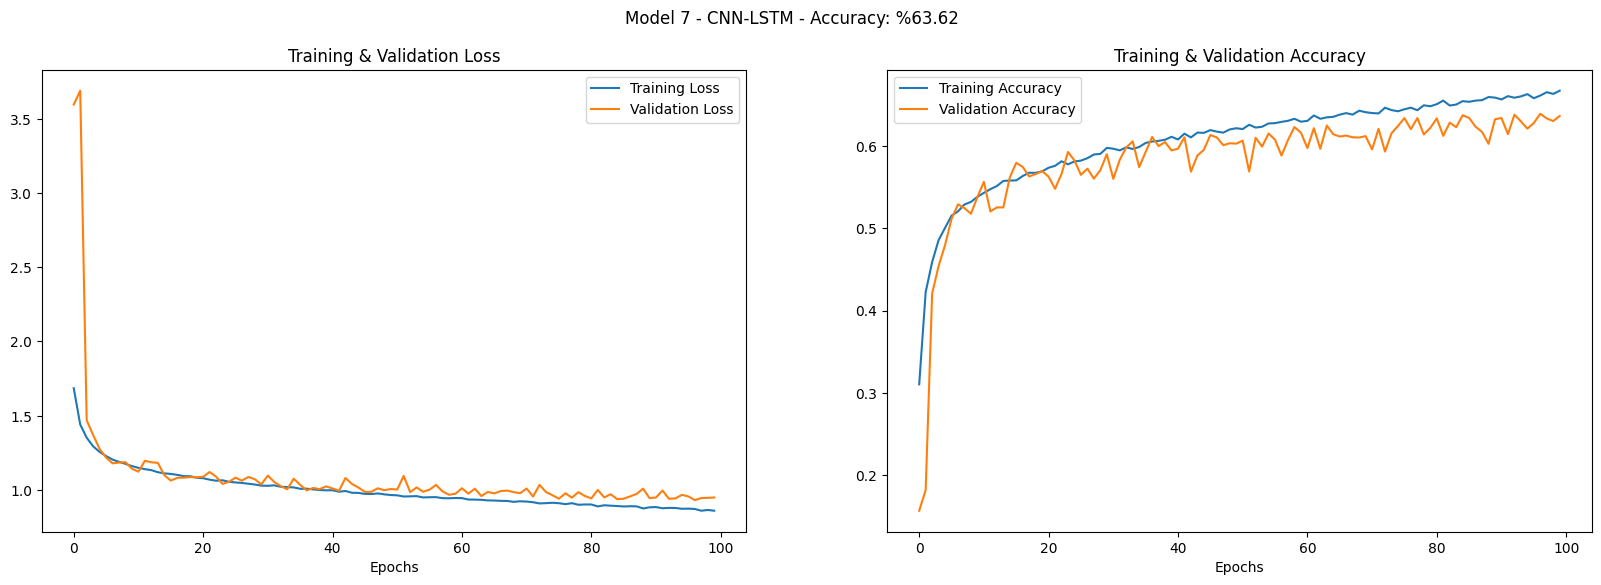

In [14]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
fig.suptitle(f"Model 7 - CNN-LSTM - Accuracy: %{round(eval[1]*100,2)}")
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("../SpeechER/figs/model7.png")

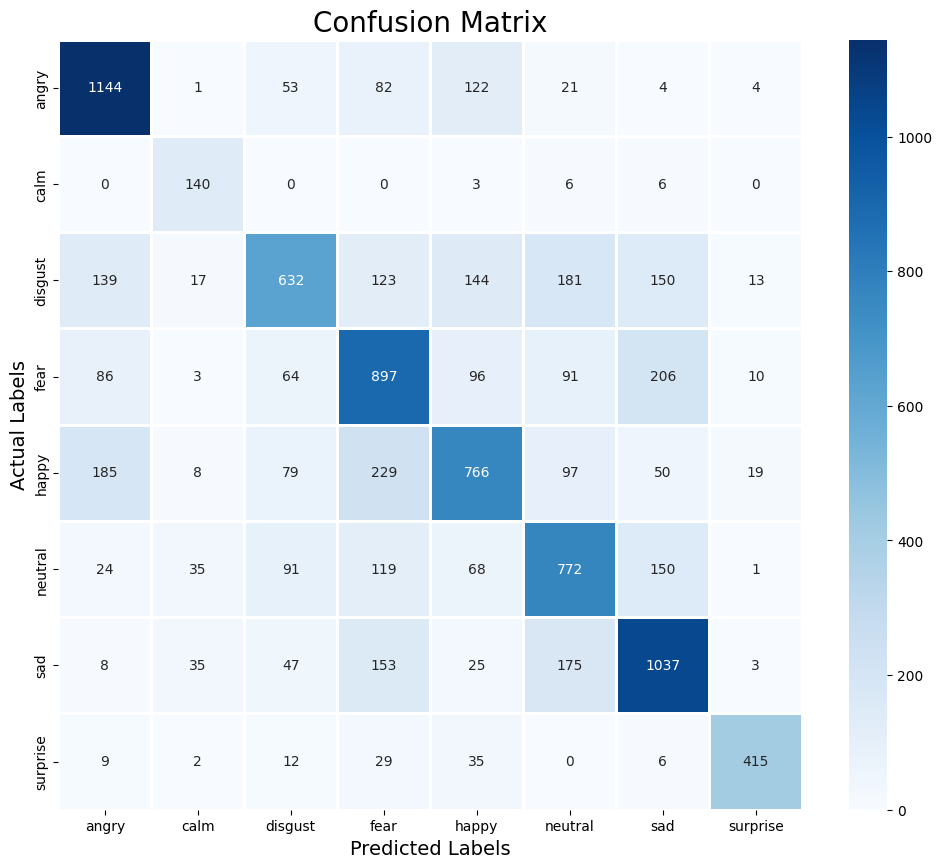

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.72      0.80      0.76      1431
        calm       0.58      0.90      0.71       155
     disgust       0.65      0.45      0.53      1399
        fear       0.55      0.62      0.58      1453
       happy       0.61      0.53      0.57      1433
     neutral       0.57      0.61      0.59      1260
         sad       0.64      0.70      0.67      1483
    surprise       0.89      0.82      0.85       508

    accuracy                           0.64      9122
   macro avg       0.65      0.68      0.66      9122
weighted avg       0.64      0.64      0.63      9122

